<a href="https://www.kaggle.com/code/iliasahmed231/knnindetails?scriptVersionId=177242917" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # Linear Algebra
import pandas as pd # data handling
import matplotlib.pyplot as plt # for visualization
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Handles missing values
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.ensemble import ExtraTreesClassifier # feature selection
from sklearn.model_selection import GridSearchCV # hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import random

import warnings
warnings.filterwarnings('ignore')                                               # design coding by ilias ahmed and khallilur rahman

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/music_clean.csv')
df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [3]:
print(df.isna().sum())
print('-------------------------------')
print(f'Duplicate Value: {df.duplicated().sum()}')

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
-------------------------------
Duplicate Value: 0


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,51.660000,0.258649,0.542602,2.172204e+05,0.636464,0.137289,0.199993,-8.253305,0.077879,120.368400,0.480057,0.50000
std,14.028585,0.307494,0.160322,1.175582e+05,0.237789,0.285558,0.160435,5.158523,0.089451,28.942130,0.237854,0.50025
min,0.000000,0.000003,0.062400,-1.000000e+00,0.002510,0.000000,0.025400,-38.718000,0.023400,56.855000,0.029800,0.00000
25%,43.750000,0.013275,0.444000,1.806562e+05,0.485750,0.000000,0.100000,-9.775500,0.033100,95.909750,0.306500,0.00000
50%,54.000000,0.116000,0.548500,2.163000e+05,0.676500,0.000089,0.131000,-6.855000,0.043600,119.952961,0.473500,0.50000
75%,62.000000,0.426500,0.657000,2.605025e+05,0.822500,0.042825,0.273250,-4.977750,0.074950,140.033000,0.654000,1.00000
max,82.000000,0.996000,0.950000,1.617333e+06,0.995000,0.975000,0.991000,-0.883000,0.710000,207.852000,0.968000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [7]:
corr = df[['popularity', 'acousticness', 'danceability', 'duration_ms','energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'genre']].corr()['genre'].sort_values(ascending = False)

corr = corr.to_frame()
corr.style.background_gradient(cmap = 'RdYlBu')

,genre
genre,1.000000
popularity,0.571548
loudness,0.213062
energy,0.186644
valence,0.114406
tempo,0.079538
danceability,-0.029817
liveness,-0.038217
duration_ms,-0.062171
acousticness,-0.194291


In [8]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')

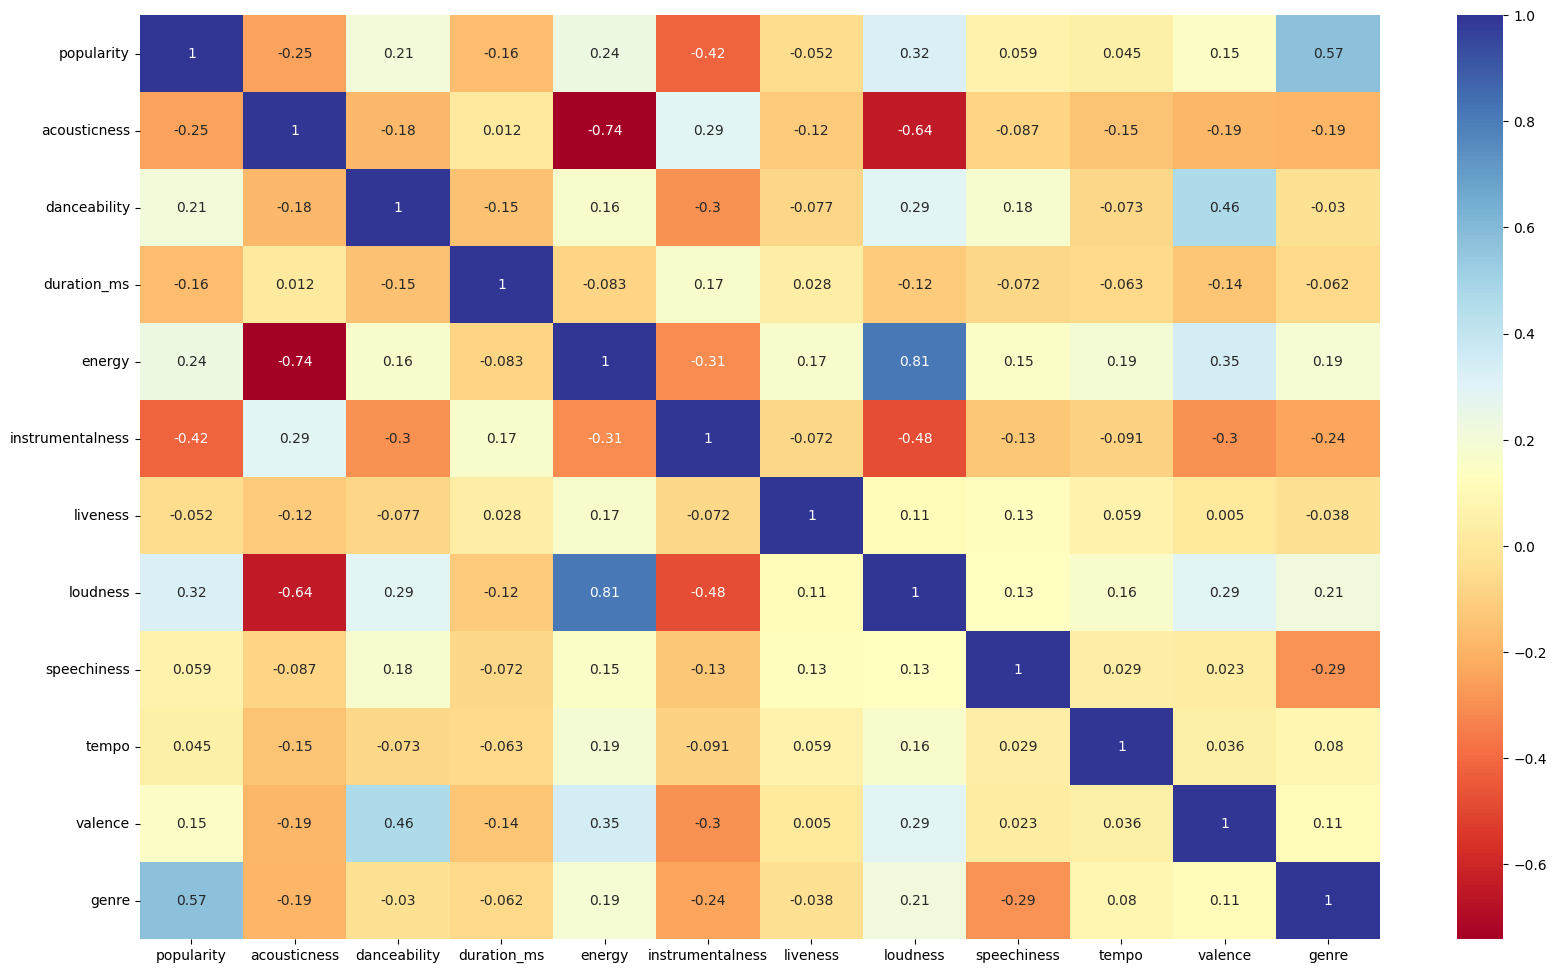

In [9]:
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [10]:
X = df.drop('genre', axis = 1) # Features
y = df['genre']

In [11]:
feat_selection = ExtraTreesClassifier()
feat_selection.fit(X, y)

ExtraTreesClassifier()

In [12]:
ExtraTreesClassifier()

ExtraTreesClassifier()

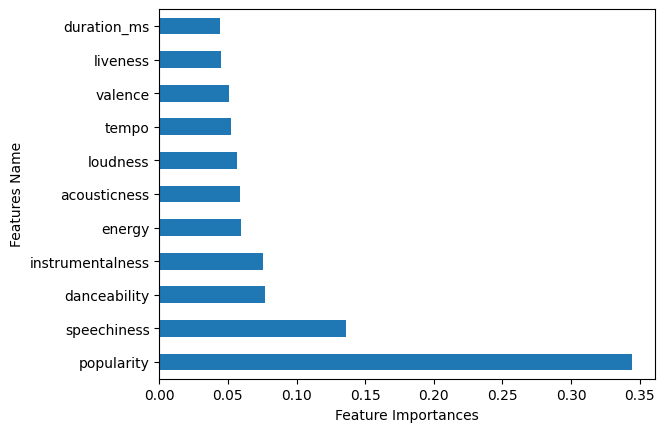

In [13]:
feat_importances = pd.Series(feat_selection.feature_importances_, index = X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind = 'barh')
plt.xlabel('Feature Importances')
plt.ylabel('Features Name')
plt.show()

In [14]:
feat_importances.sort_values(ascending = False)

popularity          0.344092
speechiness         0.135801
danceability        0.076723
instrumentalness    0.075839
energy              0.059520
acousticness        0.058716
loudness            0.056941
tempo               0.052383
valence             0.051116
liveness            0.044648
duration_ms         0.044220
dtype: float64

In [15]:
X = df[feat_importances[:6].index] # features
y = df['genre']

In [16]:
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness
0,60.0,0.896000,0.726,214547.0,0.1770,0.000002
1,63.0,0.003840,0.635,190448.0,0.9080,0.083400
2,59.0,0.000075,0.352,456320.0,0.9560,0.020300
3,54.0,0.945000,0.488,352280.0,0.3260,0.015700
4,55.0,0.245000,0.667,273693.0,0.6470,0.000297
...,...,...,...,...,...,...
995,57.0,0.972000,0.193,208040.0,0.0329,0.929000
996,56.0,0.005790,0.939,144453.0,0.3730,0.000000
997,54.0,0.016100,0.739,238339.0,0.5390,0.000000
998,62.0,0.326000,0.515,286707.0,0.5050,0.000000


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [18]:
knn.score(X_train, y_train)

0.66125

In [19]:
knn.score(X_test, y_test)

0.585

In [20]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.48      0.54       103
           1       0.56      0.70      0.62        97

    accuracy                           0.58       200
   macro avg       0.59      0.59      0.58       200
weighted avg       0.59      0.58      0.58       200



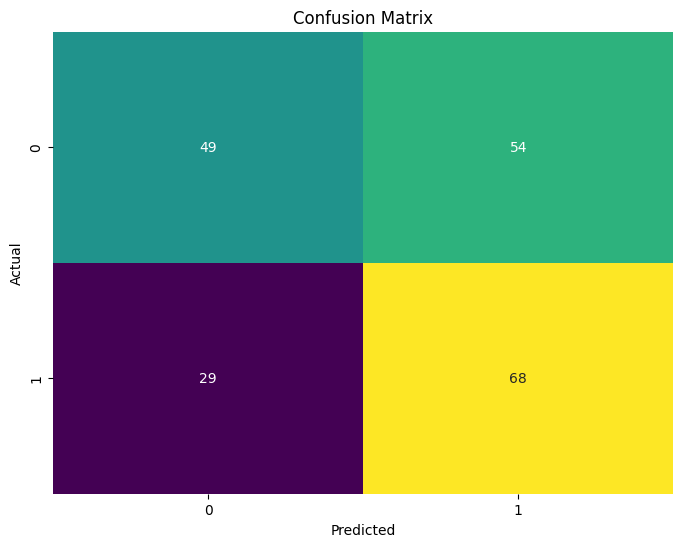

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
#TP: Actual & Predicted both are positive ---> 68
#FP: Actual Negative, Model predicted as positive ---> 54
#TN: Actual and Predicted both are negative -----> 49
#FN: Actual Positive but predicted as Negative ----> 29

In [23]:
TP = 68
FP = 54
TN = 49
FN = 29

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision}\nRecall: {recall}\nf1_score: {f1_score}')

Precision: 0.5573770491803278
Recall: 0.7010309278350515
f1_score: 0.6210045662100456


In [24]:
# choosing k

neighbors = np.arange(3, 35)

train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(f'Train Accuracies: \n{train_accuracies}\n\nTest Accuracies: \n{test_accuracies}')

Train Accuracies: 
{3: 0.75375, 4: 0.71, 5: 0.70625, 6: 0.6775, 7: 0.68125, 8: 0.6575, 9: 0.68, 10: 0.65625, 11: 0.66125, 12: 0.64625, 13: 0.65, 14: 0.63875, 15: 0.63625, 16: 0.62, 17: 0.63375, 18: 0.63125, 19: 0.62875, 20: 0.6275, 21: 0.62375, 22: 0.6275, 23: 0.6275, 24: 0.61875, 25: 0.62875, 26: 0.62375, 27: 0.6275, 28: 0.6275, 29: 0.62375, 30: 0.62625, 31: 0.6275, 32: 0.6325, 33: 0.63125, 34: 0.63125}

Test Accuracies: 
{3: 0.555, 4: 0.54, 5: 0.55, 6: 0.565, 7: 0.59, 8: 0.575, 9: 0.605, 10: 0.595, 11: 0.585, 12: 0.58, 13: 0.59, 14: 0.6, 15: 0.56, 16: 0.57, 17: 0.555, 18: 0.545, 19: 0.58, 20: 0.55, 21: 0.575, 22: 0.555, 23: 0.59, 24: 0.595, 25: 0.615, 26: 0.595, 27: 0.61, 28: 0.615, 29: 0.595, 30: 0.59, 31: 0.595, 32: 0.61, 33: 0.62, 34: 0.61}


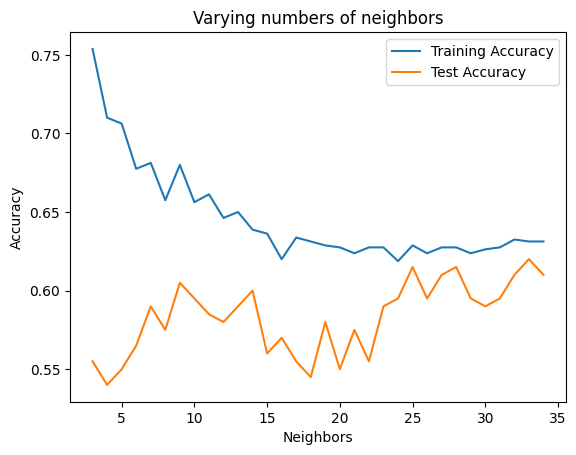

In [25]:
plt.title('Varying numbers of neighbors')
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Test Accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [27]:
print(f'Trainning Accuracy: {knn.score(X_train, y_train)}')
print(f'Testing Accuracy: {knn.score(X_test, y_test)}')

Trainning Accuracy: 0.62875
Testing Accuracy: 0.615


In [28]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']
}
grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'uniform'}


In [29]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 27, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=27)

In [30]:
print(f'Trainning Accuracy: {knn.score(X_train, y_train)}')
print(f'Testing Accuracy: {knn.score(X_test, y_test)}')

Trainning Accuracy: 0.625
Testing Accuracy: 0.61


In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(f'Trainning Accuracy: {dt.score(X_train, y_train)}')
print(f'Testing Accuracy: {dt.score(X_test, y_test)}')

Trainning Accuracy: 1.0
Testing Accuracy: 0.785


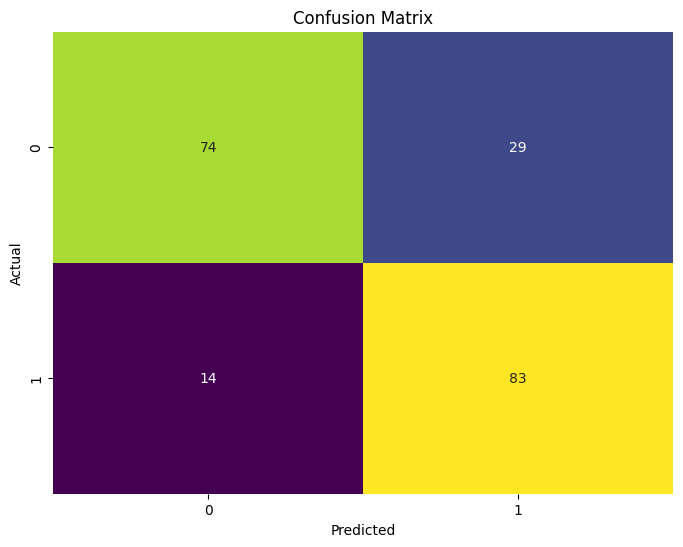

In [32]:
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
param_grid = {
    'max_depth': [2, 5, 7, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4]
}
grid_search = GridSearchCV(dt, param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [34]:
dt = DecisionTreeClassifier(max_depth= 2, min_samples_leaf =1, min_samples_split =2)
dt.fit(X_train, y_train)
print(f'Trainning Accuracy: {dt.score(X_train, y_train)}')
print(f'Testing Accuracy: {dt.score(X_test, y_test)}')

Trainning Accuracy: 0.84125
Testing Accuracy: 0.8


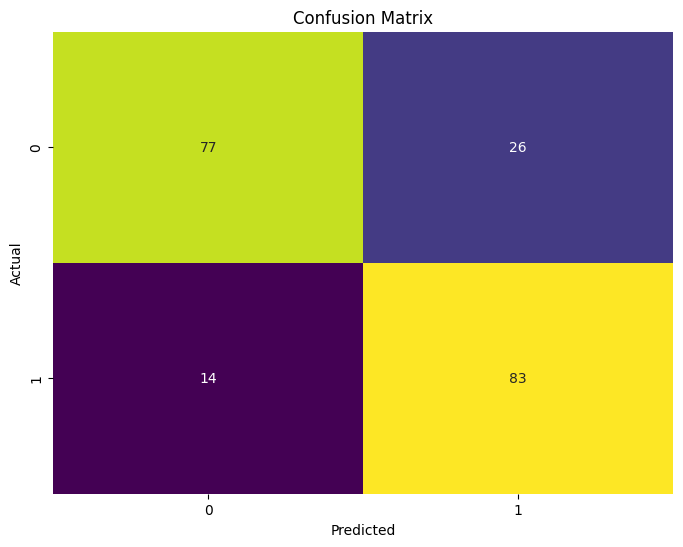

In [35]:
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

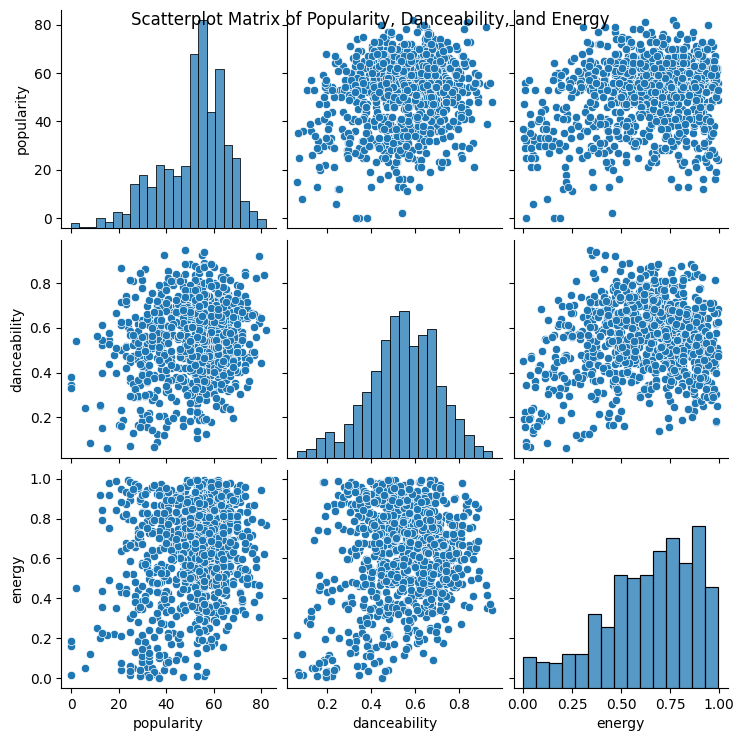

In [36]:
sns.pairplot(df[['popularity', 'danceability', 'energy']])
plt.suptitle('Scatterplot Matrix of Popularity, Danceability, and Energy')
plt.show()

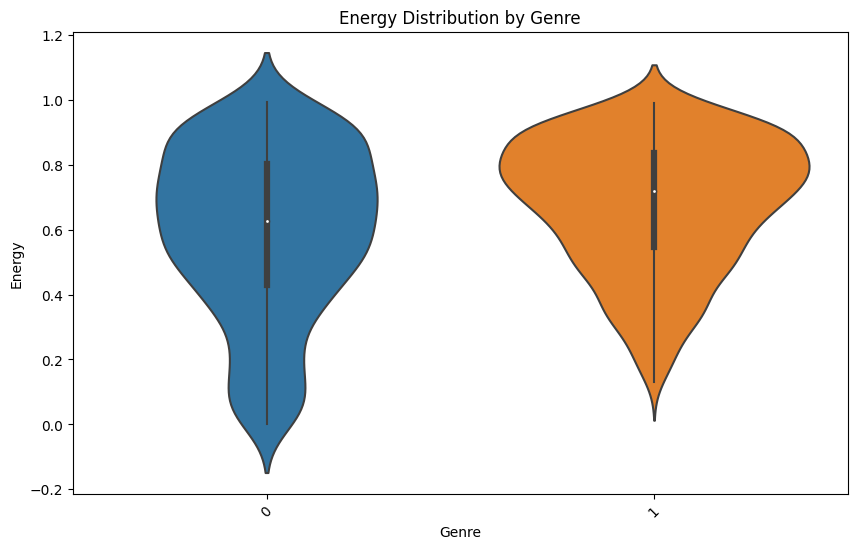

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='genre', y='energy', data=df)
plt.title('Energy Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()


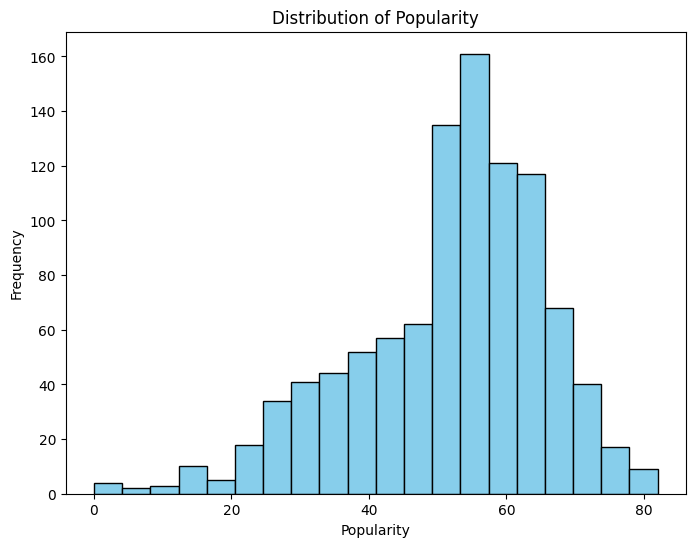

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

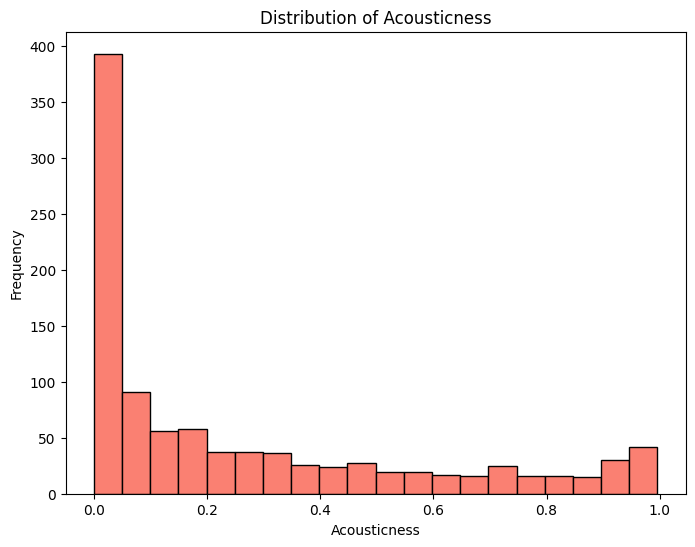

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(df['acousticness'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

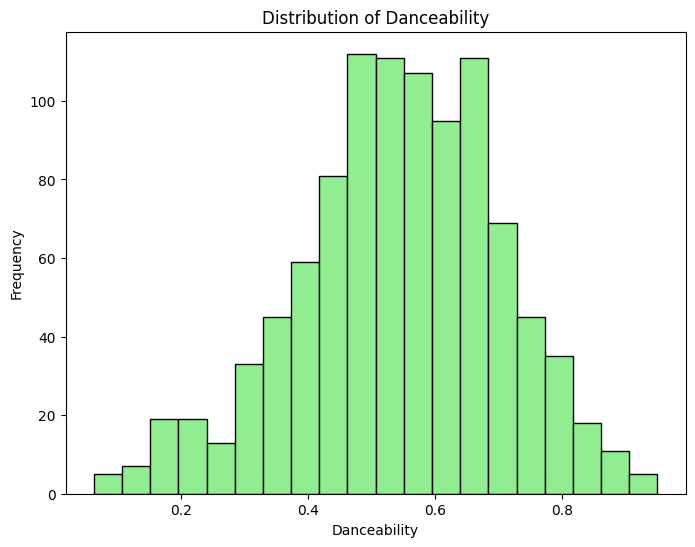

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(df['danceability'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

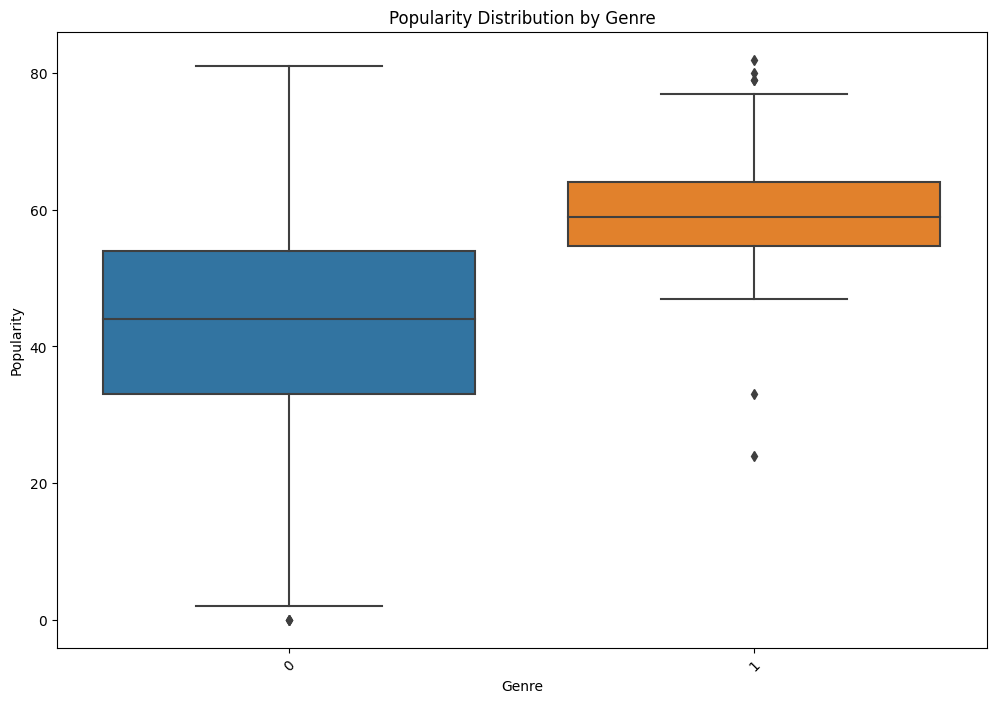

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='popularity', data=df)
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

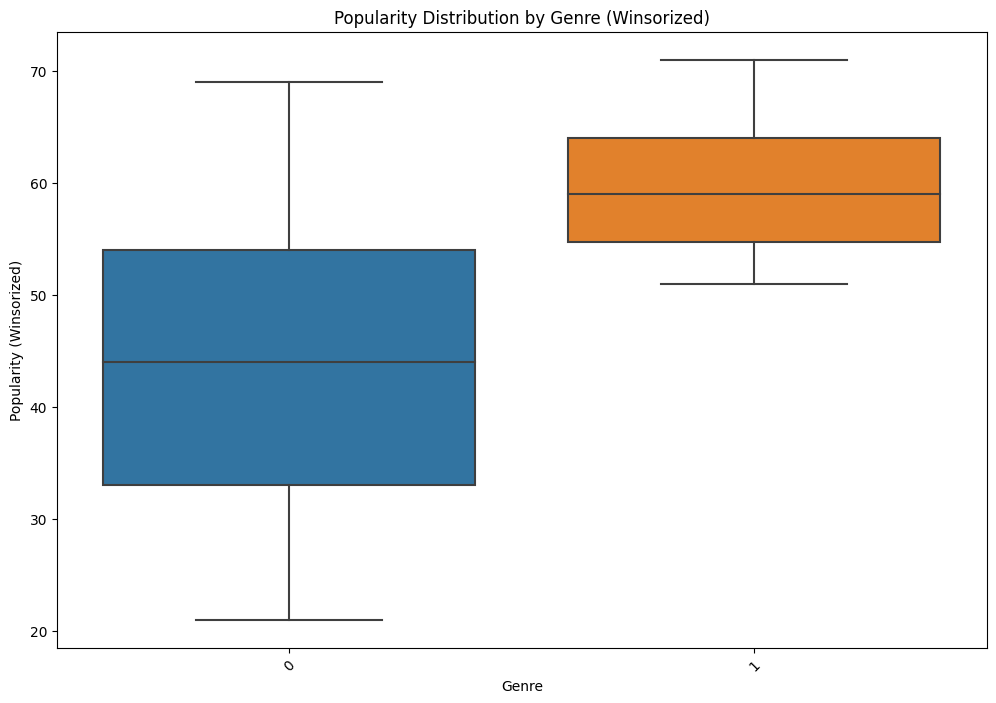

In [42]:
import numpy as np
from scipy.stats.mstats import winsorize

# Winsorize 'popularity' column within each genre
df['popularity_winsorized'] = df.groupby('genre')['popularity'].transform(lambda x: winsorize(x, limits=(0.05, 0.05)))

plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='popularity_winsorized', data=df)
plt.title('Popularity Distribution by Genre (Winsorized)')
plt.xlabel('Genre')
plt.ylabel('Popularity (Winsorized)')
plt.xticks(rotation=45)
plt.show()

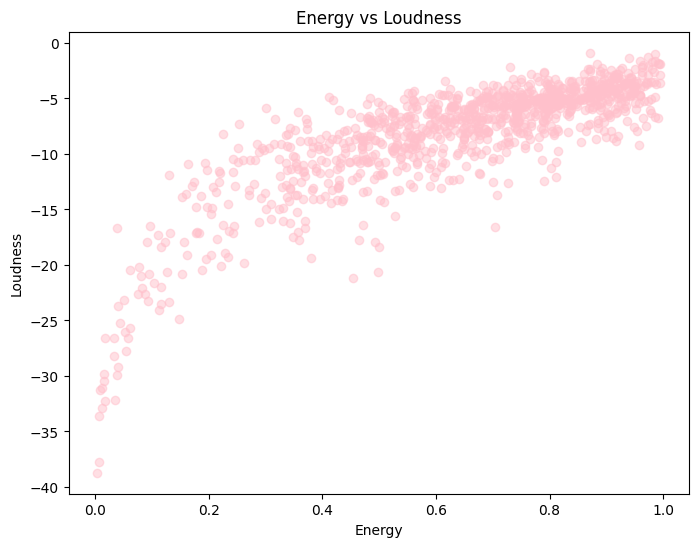

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['loudness'], color='pink', alpha=0.5)
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

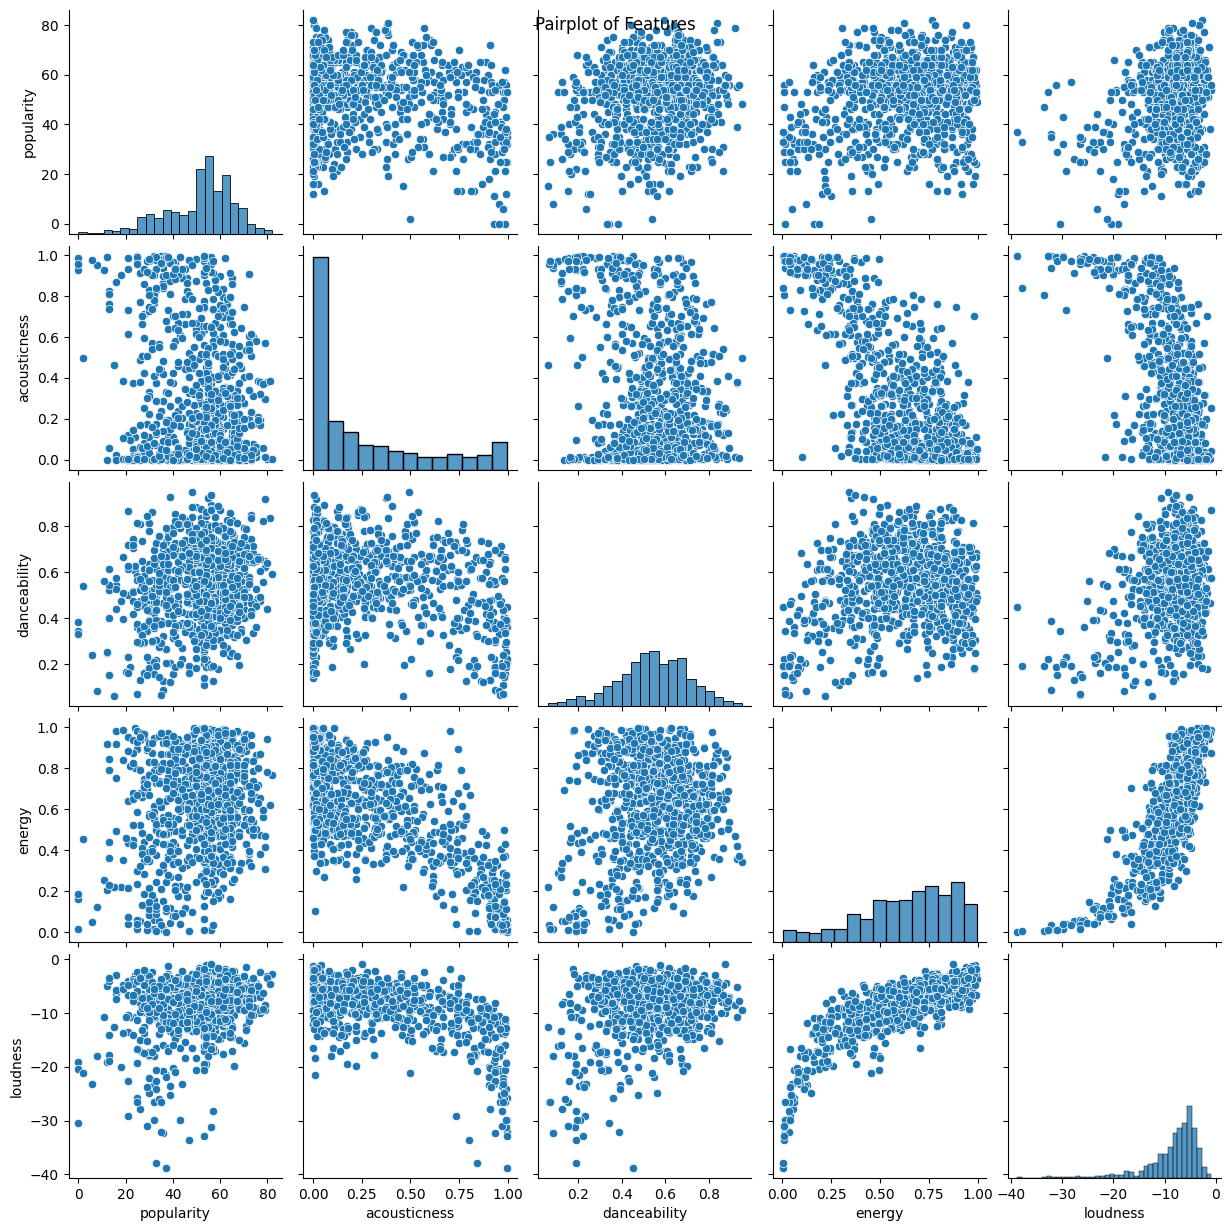

In [44]:
sns.pairplot(df[['popularity', 'acousticness', 'danceability', 'energy', 'loudness']])
plt.suptitle('Pairplot of Features')
plt.show()

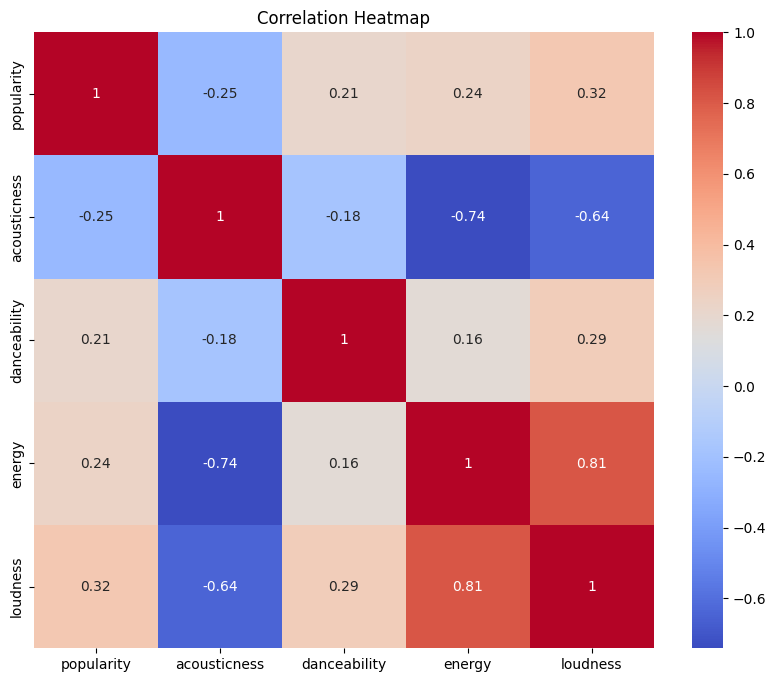

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['popularity', 'acousticness', 'danceability', 'energy', 'loudness']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

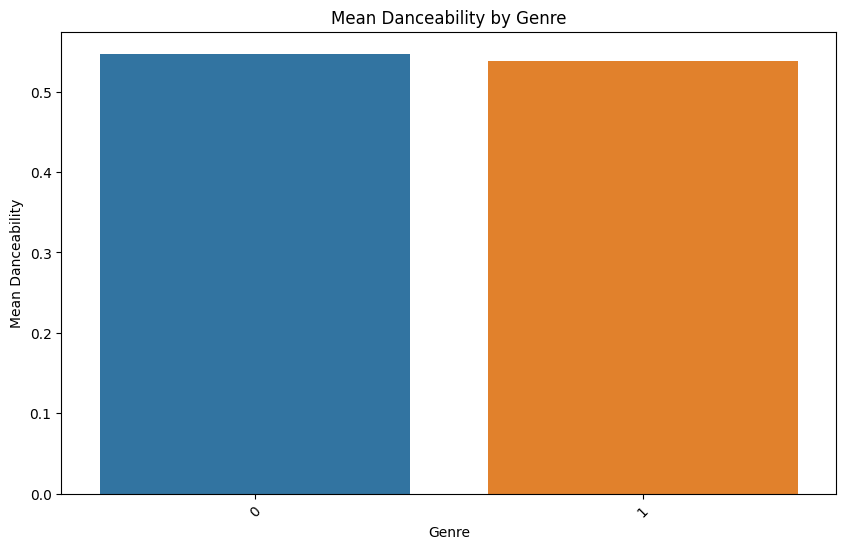

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='danceability', data=df, estimator=np.mean, ci=None)
plt.title('Mean Danceability by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Danceability')
plt.xticks(rotation=45)
plt.show()

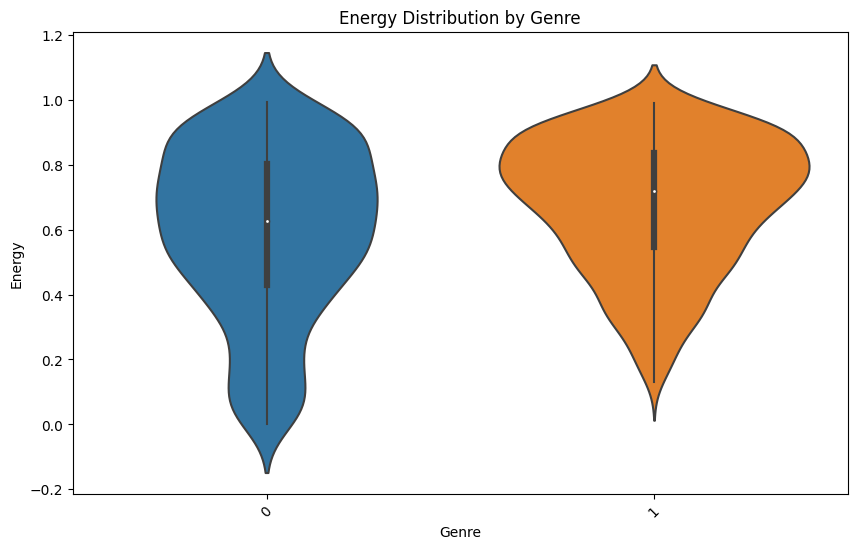

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='genre', y='energy', data=df)
plt.title('Energy Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()

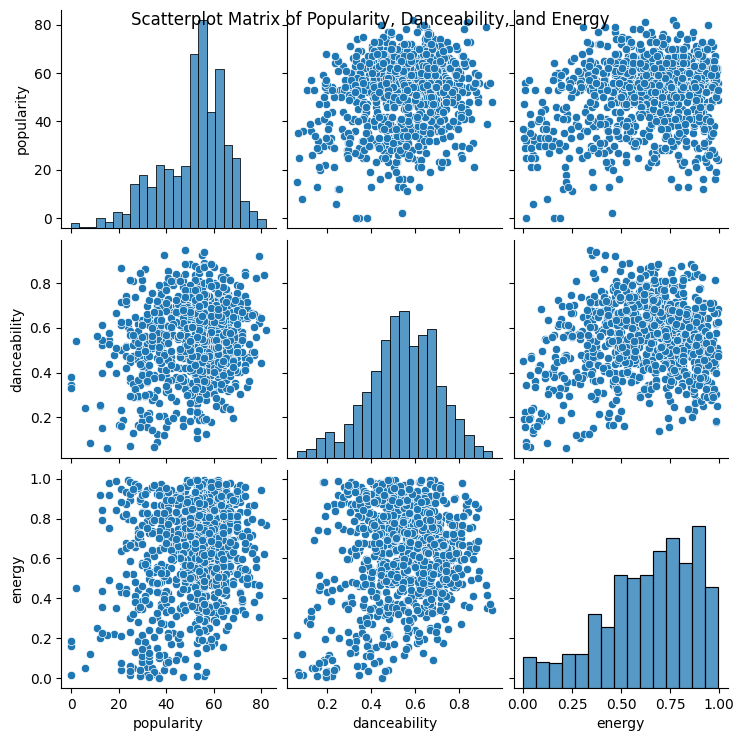

In [48]:
sns.pairplot(df[['popularity', 'danceability', 'energy']])
plt.suptitle('Scatterplot Matrix of Popularity, Danceability, and Energy')
plt.show()

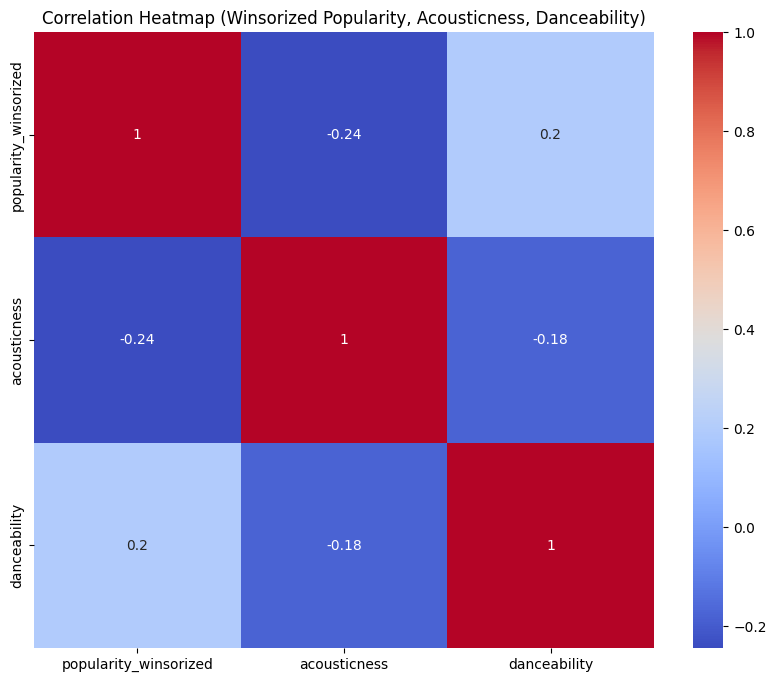

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['popularity_winsorized', 'acousticness', 'danceability']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Winsorized Popularity, Acousticness, Danceability)')
plt.show()

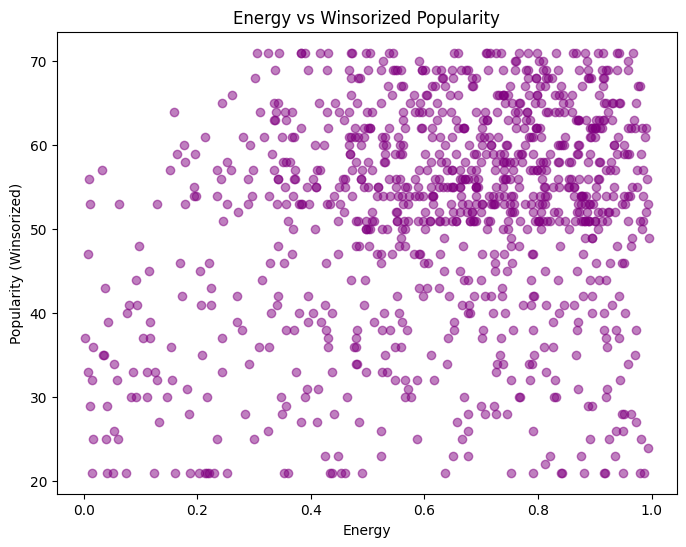

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['popularity_winsorized'], color='purple', alpha=0.5)
plt.title('Energy vs Winsorized Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity (Winsorized)')
plt.show()

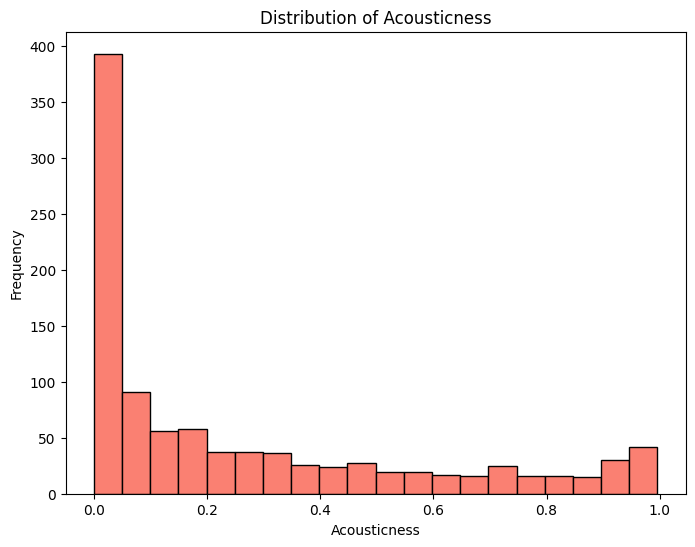

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(df['acousticness'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

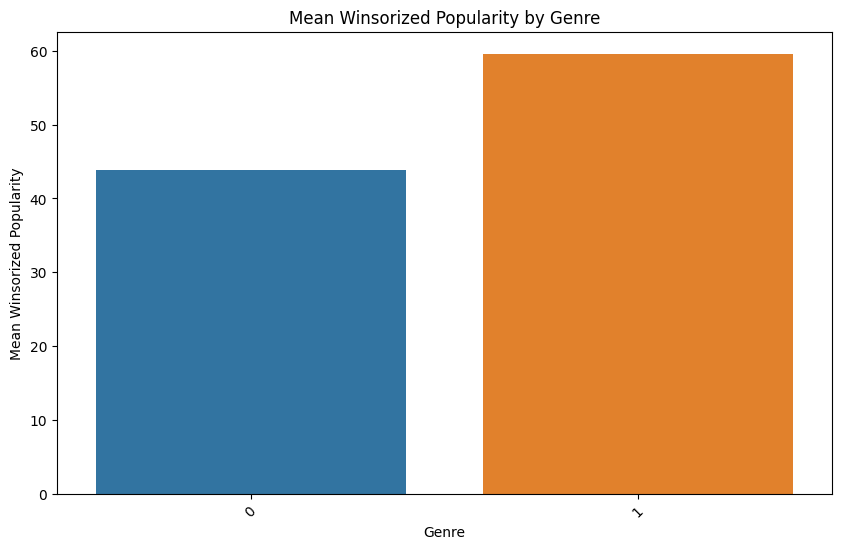

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='popularity_winsorized', data=df, estimator=np.mean, ci=None)
plt.title('Mean Winsorized Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Winsorized Popularity')
plt.xticks(rotation=45)
plt.show()

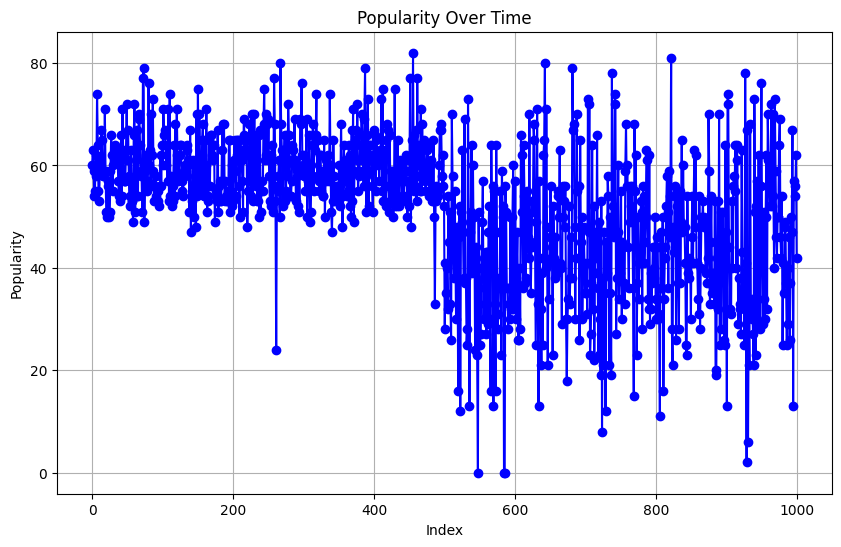

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['popularity'], color='blue', marker='o', linestyle='-')
plt.title('Popularity Over Time')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

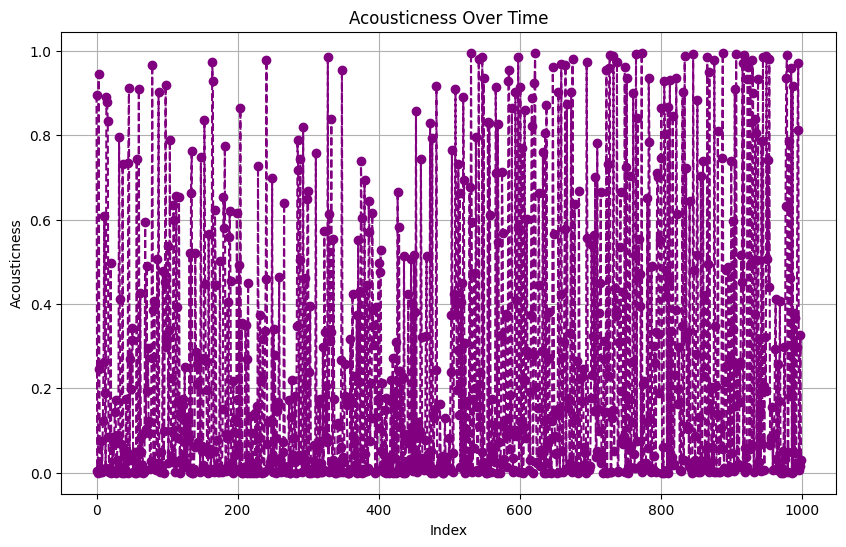

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['acousticness'], color='purple', marker='o', linestyle='--')
plt.title('Acousticness Over Time')
plt.xlabel('Index')
plt.ylabel('Acousticness')
plt.grid(True)
plt.show()                                                     # design coding by ilias ahmed 

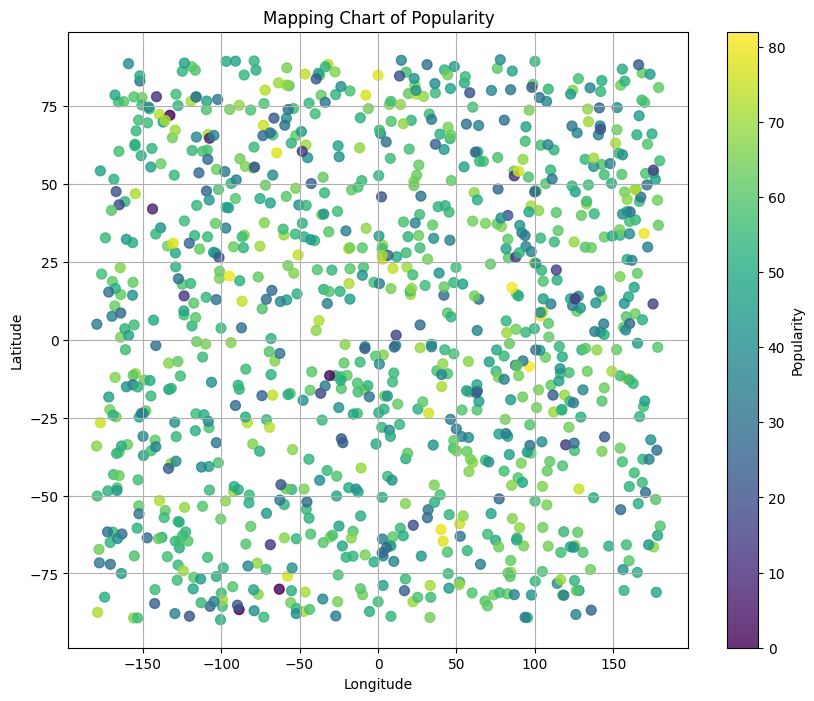

In [55]:


                                      # design coding by ilias ahmed 
df['latitude'] = [random.uniform(-90, 90) for _ in range(len(df))]
df['longitude'] = [random.uniform(-180, 180) for _ in range(len(df))]

# Plotting the mapping chart
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['popularity'], cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Popularity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapping Chart of Popularity')
plt.grid(True)
plt.show()